#  Train custom dataset in coco format

Import all stuffs :

In [5]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import os
import numpy as np
import json
from detectron2.structures import BoxMode

Register your datas in coco format :

In [10]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("jeton", {}, "images/jeton/jeton_json.json", "images/jeton")

In case you want to register again your Dataset, you need to clear dataset before :

In [7]:
DatasetCatalog.clear()

To check your dataset is correctly registered :

In [8]:
jeton_metadata = MetadataCatalog.get("jeton")

In [11]:
DatasetCatalog.get("jeton")

[03/28 14:59:07 d2.data.datasets.coco]: Loaded 15 images in COCO format from images/jeton/jeton_json.json


[{'annotations': [{'bbox': [0, 9, 639, 18],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[639.1, 8.8, 639.1, 27.4, 0, 27.4, 0, 8.8]]},
   {'bbox': [1, 68, 637, 17],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[637.8, 67.7, 637.8, 85, 1.3, 85, 1.3, 67.7]]},
   {'bbox': [1, 130, 639, 18],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[639.7, 129.9, 639.7, 147.8, 1.3, 147.8, 1.3, 129.9]]},
   {'bbox': [0, 193, 639, 16],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[639.1, 192.6, 639.1, 208.6, 0, 208.6, 0, 192.6]]},
   {'bbox': [1, 250, 637, 16],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[637.8, 250.2, 637.8, 266.3, 1.3, 266.3, 1.3, 250.2]]},
   {'bbox': [3, 309, 634, 18],
    'bbox_mode': <B

Check if your images are correctly labeled :

[03/28 14:59:11 d2.data.datasets.coco]: Loaded 15 images in COCO format from images/jeton/jeton_json.json


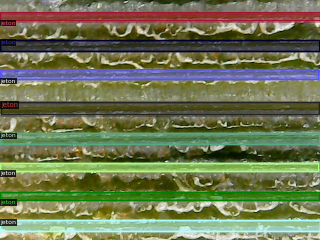

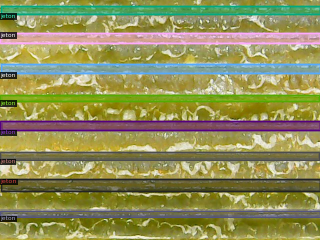

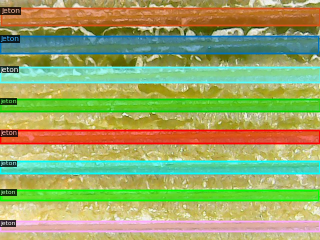

In [12]:
for d in random.sample(DatasetCatalog.get("jeton"), 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=jeton_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [27]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("jeton",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml") 
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset;
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (jeton)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)

[03/28 15:41:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[03/28 15:41:49 d2.data.datasets.coco]: Loaded 15 images in COCO format from images/jeton/jeton_json.json
[03/28 15:41:49 d2.data.build]: Removed 0 images with no usable annotations. 15 images left.
[03/28 15:41:49 d2.data.common]: Serializing 15 elements to byte tensors and concatenating them all ...
[03/28 15:41:49 d2.data.common]: Serialized dataset takes 0.02 MiB
[03/28 15:41:49 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[03/28 15:41:49 d2.data.build]: Using training sampler TrainingSampler


'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (2, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (2,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (4, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (4,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (80,) in the checkpoint but (1,) in the model! Skipped.


In [28]:
trainer.train()

[03/28 15:41:55 d2.engine.train_loop]: Starting training from iteration 0
[03/28 15:42:09 d2.utils.events]:  eta: 0:35:15  iter: 19  total_loss: 5.077  loss_cls: 0.769  loss_box_reg: 0.026  loss_mask: 0.694  loss_rpn_cls: 2.212  loss_rpn_loc: 1.289  time: 0.7143  data_time: 0.0159  lr: 0.000005  max_mem: 3519M
[03/28 15:42:24 d2.utils.events]:  eta: 0:36:02  iter: 39  total_loss: 2.931  loss_cls: 0.671  loss_box_reg: 0.229  loss_mask: 0.686  loss_rpn_cls: 0.194  loss_rpn_loc: 1.125  time: 0.7314  data_time: 0.0049  lr: 0.000010  max_mem: 3519M
[03/28 15:42:40 d2.utils.events]:  eta: 0:36:40  iter: 59  total_loss: 2.619  loss_cls: 0.568  loss_box_reg: 0.634  loss_mask: 0.673  loss_rpn_cls: 0.044  loss_rpn_loc: 0.644  time: 0.7573  data_time: 0.0053  lr: 0.000015  max_mem: 3519M
[03/28 15:42:56 d2.utils.events]:  eta: 0:37:04  iter: 79  total_loss: 2.534  loss_cls: 0.509  loss_box_reg: 0.738  loss_mask: 0.654  loss_rpn_cls: 0.056  loss_rpn_loc: 0.557  time: 0.7697  data_time: 0.0056  lr:

[03/28 15:51:21 d2.utils.events]:  eta: 0:32:15  iter: 679  total_loss: 1.184  loss_cls: 0.136  loss_box_reg: 0.356  loss_mask: 0.218  loss_rpn_cls: 0.026  loss_rpn_loc: 0.393  time: 0.8330  data_time: 0.0055  lr: 0.000170  max_mem: 3538M
[03/28 15:51:38 d2.utils.events]:  eta: 0:31:59  iter: 699  total_loss: 1.057  loss_cls: 0.110  loss_box_reg: 0.390  loss_mask: 0.220  loss_rpn_cls: 0.028  loss_rpn_loc: 0.319  time: 0.8337  data_time: 0.0051  lr: 0.000175  max_mem: 3538M
[03/28 15:51:55 d2.utils.events]:  eta: 0:31:43  iter: 719  total_loss: 1.008  loss_cls: 0.106  loss_box_reg: 0.349  loss_mask: 0.224  loss_rpn_cls: 0.023  loss_rpn_loc: 0.306  time: 0.8339  data_time: 0.0053  lr: 0.000180  max_mem: 3538M
[03/28 15:52:12 d2.utils.events]:  eta: 0:31:26  iter: 739  total_loss: 0.991  loss_cls: 0.099  loss_box_reg: 0.366  loss_mask: 0.209  loss_rpn_cls: 0.025  loss_rpn_loc: 0.300  time: 0.8341  data_time: 0.0049  lr: 0.000185  max_mem: 3538M
[03/28 15:52:30 d2.utils.events]:  eta: 0:31

[03/28 16:00:39 d2.utils.events]:  eta: 0:23:20  iter: 1339  total_loss: 0.782  loss_cls: 0.081  loss_box_reg: 0.250  loss_mask: 0.172  loss_rpn_cls: 0.023  loss_rpn_loc: 0.254  time: 0.8382  data_time: 0.0056  lr: 0.000250  max_mem: 3538M
[03/28 16:00:55 d2.utils.events]:  eta: 0:23:01  iter: 1359  total_loss: 0.738  loss_cls: 0.082  loss_box_reg: 0.232  loss_mask: 0.163  loss_rpn_cls: 0.027  loss_rpn_loc: 0.228  time: 0.8382  data_time: 0.0054  lr: 0.000250  max_mem: 3538M
[03/28 16:01:12 d2.utils.events]:  eta: 0:22:44  iter: 1379  total_loss: 0.762  loss_cls: 0.072  loss_box_reg: 0.243  loss_mask: 0.177  loss_rpn_cls: 0.023  loss_rpn_loc: 0.239  time: 0.8381  data_time: 0.0054  lr: 0.000250  max_mem: 3538M
[03/28 16:01:29 d2.utils.events]:  eta: 0:22:27  iter: 1399  total_loss: 0.716  loss_cls: 0.068  loss_box_reg: 0.234  loss_mask: 0.165  loss_rpn_cls: 0.019  loss_rpn_loc: 0.229  time: 0.8382  data_time: 0.0056  lr: 0.000250  max_mem: 3538M
[03/28 16:01:46 d2.utils.events]:  eta: 

[03/28 16:10:01 d2.utils.events]:  eta: 0:14:06  iter: 1999  total_loss: 0.639  loss_cls: 0.058  loss_box_reg: 0.205  loss_mask: 0.136  loss_rpn_cls: 0.023  loss_rpn_loc: 0.201  time: 0.8426  data_time: 0.0056  lr: 0.000250  max_mem: 3538M
[03/28 16:10:18 d2.utils.events]:  eta: 0:13:50  iter: 2019  total_loss: 0.578  loss_cls: 0.062  loss_box_reg: 0.180  loss_mask: 0.130  loss_rpn_cls: 0.017  loss_rpn_loc: 0.185  time: 0.8427  data_time: 0.0049  lr: 0.000250  max_mem: 3538M
[03/28 16:10:35 d2.utils.events]:  eta: 0:13:31  iter: 2039  total_loss: 0.577  loss_cls: 0.056  loss_box_reg: 0.191  loss_mask: 0.128  loss_rpn_cls: 0.018  loss_rpn_loc: 0.177  time: 0.8426  data_time: 0.0054  lr: 0.000250  max_mem: 3538M
[03/28 16:10:52 d2.utils.events]:  eta: 0:13:16  iter: 2059  total_loss: 0.585  loss_cls: 0.048  loss_box_reg: 0.181  loss_mask: 0.131  loss_rpn_cls: 0.021  loss_rpn_loc: 0.173  time: 0.8430  data_time: 0.0058  lr: 0.000250  max_mem: 3538M
[03/28 16:11:10 d2.utils.events]:  eta: 

[03/28 16:19:25 d2.utils.events]:  eta: 0:04:50  iter: 2659  total_loss: 0.470  loss_cls: 0.043  loss_box_reg: 0.140  loss_mask: 0.096  loss_rpn_cls: 0.013  loss_rpn_loc: 0.165  time: 0.8454  data_time: 0.0049  lr: 0.000250  max_mem: 3538M
[03/28 16:19:42 d2.utils.events]:  eta: 0:04:33  iter: 2679  total_loss: 0.449  loss_cls: 0.042  loss_box_reg: 0.141  loss_mask: 0.096  loss_rpn_cls: 0.019  loss_rpn_loc: 0.157  time: 0.8452  data_time: 0.0052  lr: 0.000250  max_mem: 3538M
[03/28 16:19:59 d2.utils.events]:  eta: 0:04:16  iter: 2699  total_loss: 0.516  loss_cls: 0.049  loss_box_reg: 0.169  loss_mask: 0.118  loss_rpn_cls: 0.015  loss_rpn_loc: 0.163  time: 0.8453  data_time: 0.0051  lr: 0.000250  max_mem: 3538M
[03/28 16:20:17 d2.utils.events]:  eta: 0:03:59  iter: 2719  total_loss: 0.470  loss_cls: 0.047  loss_box_reg: 0.153  loss_mask: 0.108  loss_rpn_cls: 0.019  loss_rpn_loc: 0.150  time: 0.8456  data_time: 0.0051  lr: 0.000250  max_mem: 3538M
[03/28 16:20:33 d2.utils.events]:  eta: 

Register my Dataset for validation :

In [29]:
register_coco_instances("jeton_val", {}, "", "images/jeton/val")

Make new predictor for testing your new weights :

In [30]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("jeton_val", )
predictor = DefaultPredictor(cfg)

In [34]:
import glob
path = './images/jeton/val/'
files = [f for f in glob.glob(path + "*.*", recursive=True)]

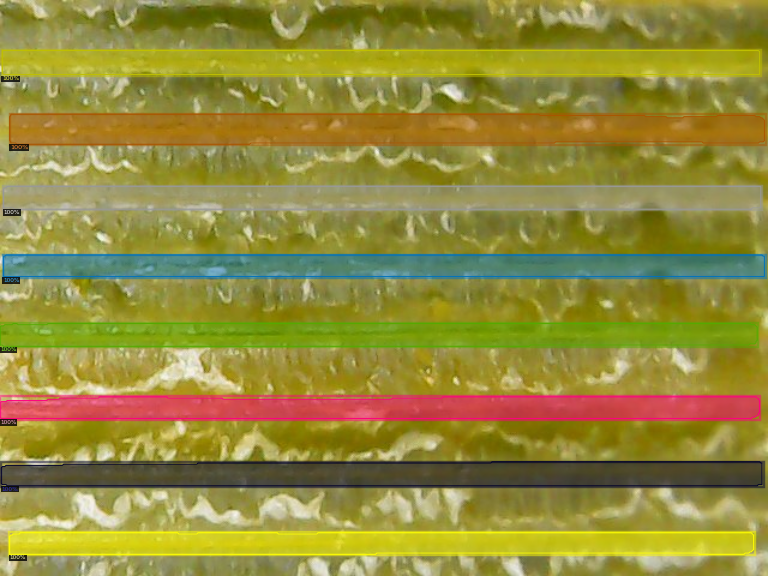

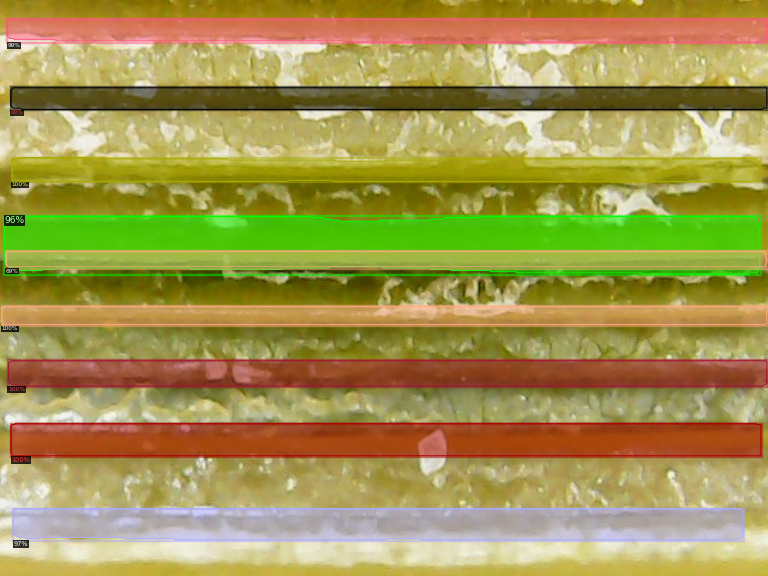

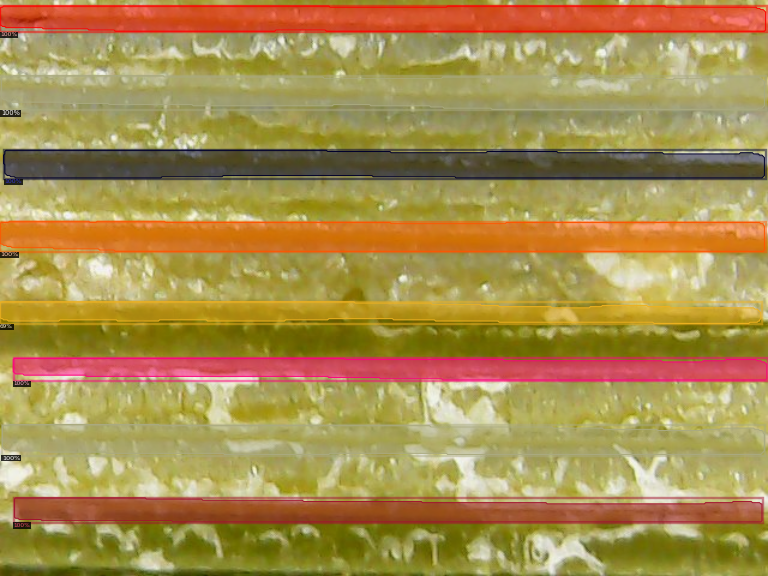

In [40]:
for i in random.sample(files, 3):
    img = cv2.imread(i)
    outputs = predictor(img)
    v = Visualizer(img[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [25]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [26]:
%tensorboard --logdir output --bind_all

<IPython.core.display.Javascript object>

In [17]:
cfg.OUTPUT_DIR

'./output'